In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import applications
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Activation, Flatten, Dropout, BatchNormalization
from tensorflow.image import rgb_to_grayscale

In [2]:
cat = 'mmm'

In [3]:
df = pd.read_csv(f'{cat}_attr.csv')
df = df.drop(df.columns[1:5], axis = 1).fillna(0)
df

,image_name,mini,midi,maxi
0,img/Open-Shoulder_Eyelash_Lace_Dress/img_00000...,1.0,0.0,0.0
1,img/Open-Shoulder_Eyelash_Lace_Dress/img_00000...,1.0,0.0,0.0
2,img/Open-Shoulder_Eyelash_Lace_Dress/img_00000...,1.0,0.0,0.0
3,img/Open-Shoulder_Eyelash_Lace_Dress/img_00000...,1.0,0.0,0.0
4,img/Open-Shoulder_Eyelash_Lace_Dress/img_00000...,1.0,0.0,0.0
...,...,...,...,...
8180,img/Chiffon-Paneled_Maxi_Dress/img_00000024.jpg,0.0,0.0,1.0
8181,img/Crocheted_Gauze_Maxi_Dress/img_00000020.jpg,0.0,0.0,1.0
8182,img/Dainty_A-Line_Dress/img_00000074.jpg,0.0,0.0,1.0
8183,img/Butterfly_Print_Maxi_Dress/img_00000066.jpg,0.0,0.0,1.0


In [4]:
all_array = np.load(f'{cat}_array.npz', allow_pickle=True)['arr_0']
all_array = np.array([x.numpy() / 255 for x in all_array]) #color
# all_array = np.array([rgb_to_grayscale(x.numpy()) / 255 for x in all_array]) #grayscale

all_array

array([[[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843]],

        ...,

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(all_array, df.drop('image_name', axis=1), random_state=1, test_size=0.2)

In [6]:
all_array.shape

(8185, 100, 100, 3)

In [7]:
y_train.shape

(6548, 3)

In [8]:
y_test.shape

(1637, 3)

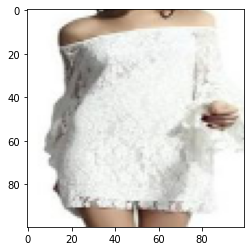

In [9]:
plt.imshow(X_train[1])

In [10]:
# # model = applications.VGG19(weights = 'imagenet', include_top=False, input_shape= (300,300,3))
# model = applications.ResNet50(weights = 'imagenet', include_top=False, input_shape= (300,300,3))
# for layer in model.layers[:20]:
#     layer.trainable = False
    
# x = model.output
# x = Conv2D(128, (3,3), activation = 'relu')(x)
# x = Dense(64, activation = 'relu')(x)
# x = Dropout(0.5)(x)
# x = Dense(64, activation = 'relu')(x)
# x = Flatten()(x)
# x = Dense(128, activation = 'relu')(x)
# predictions = Dense(y_train.shape[1], activation = 'softmax')(x)

# model_final = Model(model.input, predictions)
# model_final.compile(loss=tf.keras.losses.categorical_crossentropy,
#               optimizer=tf.keras.optimizers.Adam(),
# #               optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001, momentum=0.9),
#               metrics=['accuracy'])
# model_final.summary()

In [11]:
# batch_size = 16
# epochs = 150
# early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, min_delta = 0.05, verbose = 1)

# history = model_final.fit(X_train, y_train,
#           batch_size=batch_size,
#           epochs=epochs,
#           verbose=1,
#           callbacks=[early_stopping],
#           validation_data=(X_test, y_test))

# # img_gen = tf.keras.preprocessing.image.ImageDataGenerator(
# #     horizontal_flip=True,
# #     rotation_range=45,
# #     width_shift_range=0.5,
# #     height_shift_range=0.5,
# #     shear_range=0.1,
# #     zoom_range=0.3,
# #     channel_shift_range=0.1,
# # )

# # train_ds = img_gen.flow(X_train, y_train, batch_size=batch_size, shuffle=True)
# # history = model_final.fit(train_ds,# y_train,
# #           batch_size=batch_size,
# #           epochs=epochs,
# #           verbose=1,
# #           callbacks=[early_stopping],
# #           validation_data=(X_test, y_test))

In [12]:
model_self = Sequential()
model_self.add(Conv2D(128, kernel_size=(9,9), activation="relu", input_shape=(100, 100, 3)))
model_self.add(BatchNormalization())
model_self.add(Dense(128,activation="relu"))
model_self.add(Dropout(0.5))
model_self.add(MaxPooling2D(pool_size=(4,4)))
model_self.add(Dense(64, activation="relu"))
model_self.add(Flatten())
model_self.add(Dense(y_train.shape[1], activation="softmax"))
model_self.summary()

model_self.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001),
              metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 92, 92, 128)       31232     
                                                                 
 batch_normalization (BatchN  (None, 92, 92, 128)      512       
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 92, 92, 128)       16512     
                                                                 
 dropout (Dropout)           (None, 92, 92, 128)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 128)      0         
 )                                                               
                                                                 
 dense_1 (Dense)             (None, 23, 23, 64)        8

In [13]:
batch_size = 64
epochs = 150

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, min_delta = 0.05, verbose = 1)

history_self = model_self.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          callbacks=[early_stopping],
          validation_data=(X_test, y_test))


# img_gen = tf.keras.preprocessing.image.ImageDataGenerator(
#     horizontal_flip=True,
#     rotation_range=15,
#     width_shift_range=0.5,
#     height_shift_range=0.5,
#     shear_range=0.1,
#     zoom_range=0.3,
#     channel_shift_range=0.1,
# )

# train_ds = img_gen.flow(X_train, y_train, batch_size=batch_size, shuffle=True)
# history_self = model_self.fit(train_ds,# y_train,
#           batch_size=batch_size,
#           epochs=epochs,
#           verbose=1,
#           callbacks=[early_stopping],
#           validation_data=(X_test, y_test))

Epoch 1/150
103/103 [==============================] - 11s 82ms/step - loss: 1.0375 - accuracy: 0.5195 - val_loss: 1.0650 - val_accuracy: 0.5535
Epoch 2/150
103/103 [==============================] - 8s 78ms/step - loss: 0.7714 - accuracy: 0.6724 - val_loss: 1.0322 - val_accuracy: 0.6268
Epoch 3/150
103/103 [==============================] - 8s 78ms/step - loss: 0.6561 - accuracy: 0.7358 - val_loss: 0.9870 - val_accuracy: 0.6243
Epoch 4/150
103/103 [==============================] - 8s 78ms/step - loss: 0.5912 - accuracy: 0.7648 - val_loss: 0.9356 - val_accuracy: 0.6066
Epoch 5/150
103/103 [==============================] - 8s 78ms/step - loss: 0.5249 - accuracy: 0.7978 - val_loss: 0.8573 - val_accuracy: 0.6335
Epoch 6/150
103/103 [==============================] - 8s 78ms/step - loss: 0.4892 - accuracy: 0.8109 - val_loss: 0.7949 - val_accuracy: 0.6817
Epoch 7/150
103/103 [==============================] - 8s 78ms/step - loss: 0.4456 - accuracy: 0.8300 - val_loss: 0.7267 - val_accuracy

Text(0.5, 1.0, 'Loss Curves')

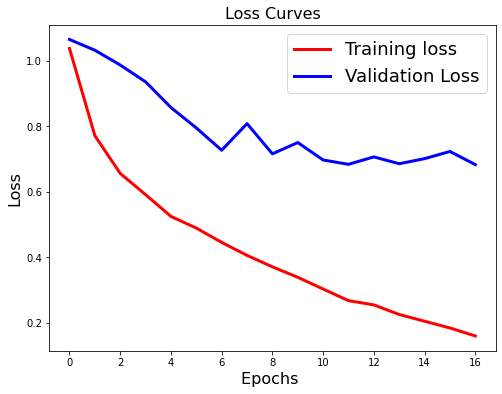

In [14]:
plt.figure(figsize=[8,6])
plt.plot(history_self.history['loss'],'r',linewidth=3.0)
plt.plot(history_self.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves')

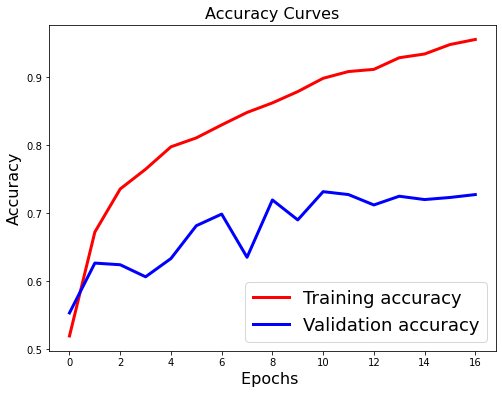

In [15]:
plt.figure(figsize=[8,6])
plt.plot(history_self.history['accuracy'],'r',linewidth=3.0)
plt.plot(history_self.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training accuracy', 'Validation accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [16]:
y_pred = np.argmax(model_self.predict(X_test), axis = 1)

In [17]:
y_pred

array([0, 2, 1, ..., 0, 1, 2], dtype=int64)

In [18]:
y_test_label = np.argmax(y_test.to_numpy(), axis = 1)

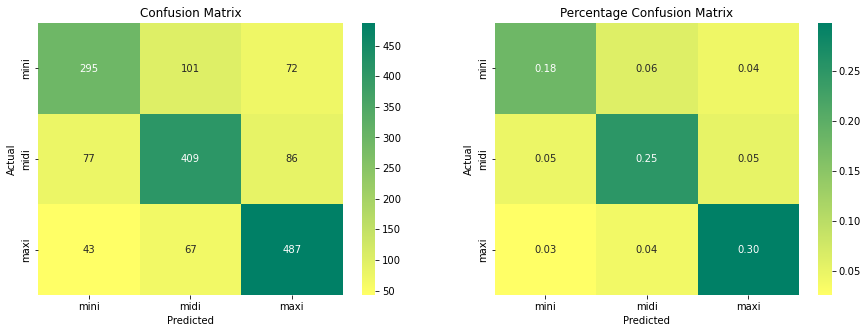

In [19]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
matrix = confusion_matrix(y_test_label, y_pred)
ticks = ['mini','midi','maxi']
sns.heatmap(matrix, annot=True, fmt='g', xticklabels=ticks, yticklabels=ticks, cmap='summer_r', ax=ax[0])
ax[0].yaxis.set_label_text('Actual')
ax[0].xaxis.set_label_text('Predicted')
ax[0].set_title('Confusion Matrix')

sns.heatmap(matrix/matrix.sum(), annot=True, fmt='0.2f', xticklabels=ticks, yticklabels=ticks, cmap='summer_r', ax=ax[1])
ax[1].yaxis.set_label_text('Actual')
ax[1].xaxis.set_label_text('Predicted')
ax[1].set_title('Percentage Confusion Matrix')

plt.show()

In [20]:
wrong_pred = y_test.copy()

In [21]:
wrong_pred['actual'] = y_test.apply(lambda x : 0 if x['mini'] else (1 if x['midi'] else 2) , axis = 1)
wrong_pred['pred'] = y_pred

In [22]:
pred_dict = {0:'Mini',1:'Midi',2:'Maxi'}
wrong_pred['pred'] = wrong_pred['pred'].map(pred_dict)
wrong_pred['actual'] = wrong_pred['actual'].map(pred_dict)

In [23]:
wrong_pred = wrong_pred.query("pred != actual")

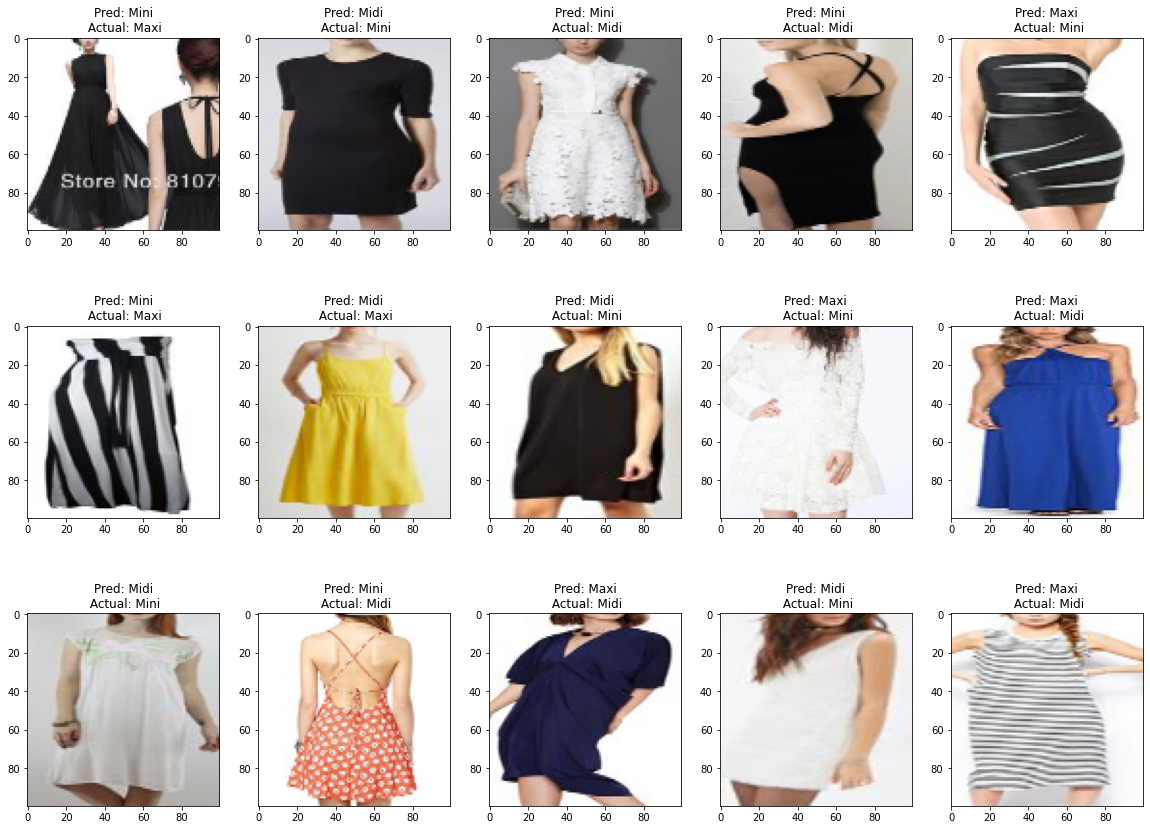

In [24]:
fig, ax = plt.subplots(3, 5, figsize = (20,15))
sample = wrong_pred.sample(15)
# sample['pred'] = sample.apply(lambda x : 'mini' if x['mini'] else ('midi' if x['midi'] else 'maxi') , axis = 1)
# actual = df.loc[sample.index].apply(lambda x : 'mini' if x['mini'] else ('midi' if x['midi'] else 'maxi') , axis = 1)
for k, a in enumerate(ax.flatten()):
    a.imshow(all_array[sample.iloc[k].name])
    a.set_title(f'Pred: {sample.iloc[k, -1]}\n Actual: {sample.iloc[k, -2]}')
plt.show()

In [25]:
model_self.save('mmm_model.h5')